# Assignment 2a - Convolutional nets
The purpose of this assignment is to help the student get started with convolutional image recogition models for the course project. This assignment will explore how convolutional nets work in depth.

In [86]:
import numpy as np
import os
import glob
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
date="05092019" #defining the date for saving files later
wd= os.getcwd()

In [88]:
allyes=glob.glob("../data/raw/yes/"+'*.[pjJ][npP][gG]') #grabs all jpg and png files
allno=glob.glob("../data/raw/no/"+'*.[pjJ][npP][gG]')
#can load with:
X=np.load("../data/processed/%s_X.npy"%(date))
y=np.load("../data/processed/%s_y.npy"%(date))

In [89]:
X.shape

(253, 400, 400, 3)

In [90]:
# X.shape

In [91]:
# import cv2
# imlist=[]
# #filename = 'your_image.jpg'
# W = 224.
# #oriimg = cv2.imread(filename,cv2.CV_LOAD_IMAGE_COLOR)
# for image in X:
#     height, width, depth = image.shape
#     imgScale = W/width
#     newX,newY = image.shape[1]*imgScale, image.shape[0]*imgScale
#     newimg = cv2.resize(image,(int(newX),int(newY)))
#     imlist.append(newimg)
# X=np.array(imlist)
# y = y.astype('float32')

In [92]:
# resX=[]
# xres = 224
# yres = 224
# resizeval = (xres,yres)
# # resize and convert to grayscale
# for img in X:
#     img = cv2.resize(img,resizeval)
# #     gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# #     img_expanded = gray[:, :, np.newaxis]
# #     #print(img_expanded.shape)

# #     print(gray.shape)
# #     gray = img.reshape((len(gray), -1)).T
# #     print(gray.shape)
#     resX.append(img)

# resX = np.array(resX)
# #resX = resX.reshape((len(resX), -1)).T
# #resX = resX.reshape(xres,yres, 1)

# X = resX
# #y = y.T
# y = y.astype('float32')

In [93]:
resX=[]
xres = 224
yres = 224
resizeval = (xres,yres)
# resize and convert to grayscale
for img in X:
    img = cv2.resize(img,resizeval)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img_expanded = gray[:, :, np.newaxis]
    #print(img_expanded.shape)

#     print(gray.shape)
    #gray = img_expanded.reshape((len(X), -1)).T
#     print(gray.shape)
    resX.append(img_expanded)

resX = np.array(resX)
#resX = resX.reshape((len(resX), -1)).T
#resX = resX.reshape(xres,yres, 1)

X = resX
#y = y.T
y = y.astype('float32')

In [94]:
X.shape

(253, 224, 224, 1)

In [95]:
224*224

50176

In [96]:
pixels = X.flatten().reshape(253, 50176)

In [97]:
pixels.shape

(253, 50176)

In [98]:
y_tindex = y[:,0]==True
y_findex = y[:,1]==True
y2=np.zeros(len(y))
y2[y_tindex]=1


Northwestern MSiA 432 Deep learning 
    Assignment #2 starter code, Spring 2019.
    
    This code demonstrates the use of transfer learning to speed up
    the training process for a convolutional neural network.
    
    Notes:
        - Heatmaps may appear black in the first few epochs. Wait until accuracy improves.
        - The native image size is 224x224 for VGG, resize/crop your images to match
        - Filter visualization is slow, change vizfilt_timeout for more speed or accuracy
        - Be sure to rename/delete the basepath when changing model parameters, e.g. layers or random labels

In [99]:
#see which pid you are am
import os
os.getpid()

30752

In [1]:
!nvidia-smi

Fri May 31 15:31:32 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 410.104      Driver Version: 410.104      CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K40c          Off  | 00000000:02:00.0 Off |                    0 |
| 41%   75C    P0   119W / 235W |  11019MiB / 11441MiB |     67%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [101]:
# ##change gpus 
# ###NOTE: this needs to be run before importing tensorflow. 
# import os
# os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [102]:
# #%% ------ CPU/GPU memory fix -------
# import tensorflow as tf, keras.backend.tensorflow_backend as ktf
# def get_session(gpu_fraction=0.45):
#     gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=gpu_fraction, allow_growth=True)
#     return tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
# ktf.set_session(get_session())

In [103]:
# Show devices
from tensorflow.python.client import device_lib
local_device_protos = device_lib.list_local_devices()
print([x.name for x in local_device_protos])

['/device:CPU:0', '/device:XLA_CPU:0', '/device:XLA_GPU:0', '/device:GPU:0']


In [104]:

import tensorflow as tf
from tensorflow.python.client import device_lib
def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

print("Tensorflow Version:", tf.__version__)
print(tf.keras.__version__)
print(get_available_gpus())

Tensorflow Version: 1.13.1
2.2.4-tf
['/device:GPU:0']


In [105]:
# ##change gpus
# import os
# os.environ["CUDA_VISIBLE_DEVICES"]="1"

# imports and function definitions

In [106]:
# #may need to install a older scipy version as some functions require it
# !pip install --ignore-installed --user scipy==1.2.1 

In [107]:
# Obligatory imports
from IPython.display import display 
from PIL import Image
import imageio

import os, time, numpy as np, scipy, random, pandas as pd, socket, warnings
import matplotlib.pyplot as plt
from keras.optimizers import Adam, SGD, RMSprop, Adagrad
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE" # Workaround for Mac
%matplotlib inline

In [108]:
# Set project configuration

def change_basepath(folder_name=None):
    """
    GE added, makes it easy to specify a folder extention that will be created onto basepath. if folder_name==None, then basepath will be reset to it's origional value.
    """
    
    basepath= "../data"
    
    if folder_name != None:
        address = os.path.join(basepath, folder_name)
    else:
        address = basepath
    if not os.path.exists(address):
        os.makedirs(address)
    return(address)
basepath= change_basepath()


In [109]:
# VGG net definition starts here. Change the vggblocks to set how many blocks to transfer
def make_vgg():
    from keras.models import Model
    from keras.regularizers import l1_l2
    from keras.layers import Flatten, Dense, Input, Convolution2D, MaxPooling2D, BatchNormalization
    from keras.layers.advanced_activations import LeakyReLU
    
    img_input = Input(shape=tsize)
    if vggblocks == 0: x = img_input 
    if vggblocks >= 1: # Block 1
        x = LeakyReLU(alpha)(Convolution2D(64, (3, 3), padding='same', name='block1_conv1')(img_input))
        x = LeakyReLU(alpha)(Convolution2D(64, (3, 3), padding='same', name='block1_conv2')(x))
        x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)
        if batchnorm: x = BatchNormalization()(x)
    if vggblocks >= 2: # Block 2
        x = LeakyReLU(alpha)(Convolution2D(128, (3, 3), padding='same', name='block2_conv1')(x))
        x = LeakyReLU(alpha)(Convolution2D(128, (3, 3), padding='same', name='block2_conv2')(x))
        x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)
        if batchnorm: x = BatchNormalization()(x)
    if vggblocks >= 3: # Block 3
        x = LeakyReLU(alpha)(Convolution2D(256, (3, 3), padding='same', name='block3_conv1')(x))
        x = LeakyReLU(alpha)(Convolution2D(256, (3, 3), padding='same', name='block3_conv2')(x))
        x = LeakyReLU(alpha)(Convolution2D(256, (3, 3), padding='same', name='block3_conv3')(x))
        x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)
        if batchnorm: x = BatchNormalization()(x)
    if vggblocks >= 4: # Block 4
        x = LeakyReLU(alpha)(Convolution2D(512, (3, 3), padding='same', name='block4_conv1')(x))
        x = LeakyReLU(alpha)(Convolution2D(512, (3, 3), padding='same', name='block4_conv2')(x))
        x = LeakyReLU(alpha)(Convolution2D(512, (3, 3), padding='same', name='block4_conv3')(x))
        x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)
        if batchnorm: x = BatchNormalization()(x)
    if vggblocks >= 5: # Block 5
        x = LeakyReLU(alpha)(Convolution2D(512, (3, 3), padding='same', name='block5_conv1')(x))
        x = LeakyReLU(alpha)(Convolution2D(512, (3, 3), padding='same', name='block5_conv2')(x))
        x = LeakyReLU(alpha)(Convolution2D(512, (3, 3), padding='same', name='block5_conv3')(x))
        x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)
        if batchnorm: x = BatchNormalization()(x)
        
    x = Flatten(name='flatten')(x)
    for i in range(fclayers): x = LeakyReLU(alpha)(Dense(fclayersize, kernel_regularizer=l1_l2(l1_reg, l2_reg))(x))
    x = Dense(len(obj_classes), activation='softmax', name='predictions')(x)
    
    inputs = img_input
    model = Model(inputs, x, name='vgg16')
    
    # VGG Transfer weights
    from keras.applications import vgg16
    import keras.layers.convolutional
    vgg16model = vgg16.VGG16(include_top=False)
    modelconv = [l for l in model.layers if type(l) == keras.layers.convolutional.Conv2D]
    vgg16conv = [l for l in vgg16model.layers if type(l) == keras.layers.convolutional.Conv2D]
    
    for i, l in enumerate(modelconv):
        if i > xferlearning: continue # Transfer only first n layers
        print('**** Transferring layer %d: %s from VGG ****' % (i, l))
        weights = vgg16conv[i].get_weights()
        modelconv[i].set_weights(weights)
        if freeze_conv: l.trainable = False

    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()
    return model, img_input

In [110]:
#%% resnet50 definition
def make_resnet50():
    #The default input size for this model is 224x224.
    #This model and can be built both with 'channels_first' data format (channels, height, width) 
    #or 'channels_last' data format (height, width, channels).
    import keras
    from keras.models import Model
    from keras.layers import Dense, GlobalAveragePooling2D, Dropout
    #from keras_applications.resnet import ResNet50
    from keras.applications import ResNet50
    from keras.regularizers import l1
    
    xmodel = ResNet50(include_top=False,
#                                        weights='imagenet',
#                                        input_tensor=None,
#                                        input_shape=None,
#                                        pooling=None,
                                       classes=10)

    #xmodel = keras.applications.Xception(include_top=False) 
#   xmodel =keras.applications.resnet50(include_top=False)
    x = xmodel.output
    #for layer in xmodel.layers: layer.trainable = False
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, kernel_regularizer=l1(1e-7))(x)
    predictions = Dense(len(obj_classes), activation='softmax')(x)
    
    model = Model(inputs=xmodel.input, outputs=predictions)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam())
    model.summary()
    return model, xmodel.input

In [111]:
#%% Xception definition
def make_xception():
    import keras
    from keras.models import Model
    from keras.layers import Dense, GlobalAveragePooling2D, Dropout
    from keras.regularizers import l1
    xmodel = keras.applications.Xception(include_top=False) #keras.applications.resnet50 to change it
    x = xmodel.output
    #for layer in xmodel.layers: layer.trainable = False
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, kernel_regularizer=l1(1e-7))(x)
    predictions = Dense(len(obj_classes), activation='softmax')(x)
    
    model = Model(inputs=xmodel.input, outputs=predictions)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam())
    model.summary()
    return model, xmodel.input

# Image Import, Scaling, Batching options

In [112]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=13)
# train_X,valid_X,train_label,valid_label = train_test_split(X_train, y_train, test_size=0.2, random_state=13)

In [113]:
#########  CHANGE IMSIZE, BATCHSIZE HERE #########
imsize        = (224, 224) # n x n square images, VGG default is 224x224. Remember to change this.
tsize         = imsize + (3,) #for 3 color channels
batch_size, nb_epoch = 32, 10000 # Change for early stopping regularization. 
#changed batchsize from #32 to 253
#########  ****************************** #########


#image path specification
trainfolder   = '../data/train'#os.path.join(basepath, 'train')
testfolder    = '../data/test'#os.path.join(basepath, 'test')


#%% Create demo data
def makedata(basepath):
    from keras.datasets import cifar10
    from keras.utils.generic_utils import Progbar    
    (X_train, y_train), (X_test, y_test) = cifar10.load_data()
    obj_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] 
    for (X_data, y_data, bp) in [(X_train, y_train, trainfolder), (X_test, y_test, testfolder)]:
        if os.path.exists(bp): return
        for c in obj_classes: os.makedirs(os.path.join(bp, c), exist_ok=True)
        pb = Progbar(len(y_data), interval=1)
        print('\nMaking data folder')
        for i, (im, lbl) in enumerate(zip(X_data, y_data)):
            pn = os.path.join(bp, obj_classes[int(lbl)], "%d.png" % i)
            pb.update(i)
            if not os.path.exists(pn): imageio.imwrite(pn, im)#scipy.misc.imsave(pn, im)

In [123]:
# makedata(basepath) # Comment out this line to use your own data

# Load data
from keras.preprocessing.image import ImageDataGenerator
##middleground data aug
datagen = ImageDataGenerator(
    rescale=1./255,                         # rescale data
    shear_range=0.2,
    zoom_range=0.2,    
    rotation_range=0.10,    #0                   # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  #0              # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1, #0                 # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,                   # randomly flip images
    vertical_flip=False)                    # randomly flip images

#no data aug
# datagen = ImageDataGenerator(
#     rescale=1./255,                         # rescale data
#     shear_range=0.0,
#     zoom_range=0.0,    
#     rotation_range=0.0,    #0                   # randomly rotate images in the range (degrees, 0 to 180)
#     width_shift_range=0.0,  #0              # randomly shift images horizontally (fraction of total width)
#     height_shift_range=0.0, #0                 # randomly shift images vertically (fraction of total height)
#     horizontal_flip=False,                   # randomly flip images
#     vertical_flip=False)                    # randomly flip images


# ##lots of data aug
# datagen = ImageDataGenerator(
#     rescale=1./255,                         # rescale data
#     shear_range=0.7,
#     zoom_range=0.7,    
#     rotation_range=0.7,    #0                   # randomly rotate images in the range (degrees, 0 to 180)
#     width_shift_range=0.7,  #0              # randomly shift images horizontally (fraction of total width)
#     height_shift_range=0.7, #0                 # randomly shift images vertically (fraction of total height)
#     horizontal_flip=True,                   # randomly flip images
#     vertical_flip=True)                    # randomly flip images


train_generator = datagen.flow_from_directory(
        trainfolder,
        target_size=imsize,
        batch_size=batch_size #changd 
)

test_generator = datagen.flow_from_directory(
        testfolder,
        target_size=imsize,
        batch_size=-1)

X_test, Y_test = test_generator.next()

obj_classes = sorted(train_generator.class_indices.keys())
class_to_idx = dict([(y, x) for (x,y) in enumerate(obj_classes)])
img_rows, img_cols, img_channels = X_test.shape[1:]


Found 204 images belonging to 2 classes.
Found 62 images belonging to 2 classes.


In [115]:
obj_classes

['False', 'True']

## visualization functions

In [116]:
#%% Visualization code
def viz_losses(stats): 
        
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))
    epoch = len(stats)
    convlayers = len([l.name for l in model.layers if 'conv' in l.name])
    blocks     = len(set([l.name.split('_')[0] for l in model.layers if 'block' in l.name]))
    dense      = len([l.name for l in model.layers if 'dense' in l.name])
    fcsize     = model.layers[-1].input_shape[1]
    fig.suptitle("Training %s blocks=%d, conv=%d, dense=%d, fcsize=%d, epoch=%d" % (model.name, blocks, convlayers, dense, fcsize, epoch))
    ax1.plot(stats['Train loss'].values, label='Train loss', color='blue')
    ax1.plot(stats['Test loss'].values, label='Test loss', color='green')
    ax1.set_yscale('log')
    ax2.plot(stats['Accuracy'].values, label='Test accuracies', color='red')
    ax2.plot(stats['Train accuracy'].values, label='Train accuracies', color='blue')
    ax2.axhline(1.0/len(obj_classes), linestyle='dashed', color='gray')
    dataset = pd.Series(train_generator.classes)
    chance = dataset.value_counts().max() / dataset.value_counts().sum()
    ax2.text(0, chance, 'Chance')
    ax2.axhline(np.max(stats['Accuracy']), linestyle='dashed', color='red')
    ax2.text(0, np.max(stats['Accuracy']), 'Best')    
    ax2.set_ylim([0, 1])
    ax2.set_title('Accuracy: %0.2f%%' % (100.0*stats['Accuracy'].values[-1]))     
    ax1.legend(), ax2.legend()
    plt.savefig(os.path.join(basepath, 'loss-%s.png' % modelarch))
    plt.show()    
    plt.close()

In [117]:
#%% Explanations
import skimage.exposure, skimage.filters
from skimage.color import gray2rgb
from keras import backend as K

def hide_axes(ax): ax.set_xticks([]), ax.set_yticks([])
class Heatmap:
    def __init__(self, model, obj_classes):
        self.obj_classes = obj_classes
        self.nclasses    = len(obj_classes)
        self.model       = model
    
    def make_masks(self, im, n=8, maskval=0.1):
        masks = []
        xwidth, ywidth = int(np.ceil(im.shape[0]/n)), int(np.ceil(im.shape[1]/n))
        for i in range(n):
            for j in range(n):
                mask = np.ones(im.shape[:2])
                mask[(i*xwidth):((i+1)*xwidth), (j*ywidth):((j+1)*ywidth)] = maskval
                mask = skimage.filters.gaussian(mask, 1) # Change this for local mask smoothing
                masks.append(mask)
        return np.array(masks)

    def get_slice_masks(self, im, n_segments=16, blur=0.03):
        from skimage.segmentation import slic
        segments = slic(im, n_segments=n_segments, sigma=5)
        masks = []
        # loop over the unique segment values
        for (i, segVal) in enumerate(np.unique(segments)):
            # construct a mask for the segment
            mask = np.zeros(im.shape[:2], dtype="float32")
            mask[segments == segVal] = 1
            mask = skimage.filters.gaussian(mask, im.shape[1]*blur) # Change this for local mask smoothing            
            masks.append(mask)
        return np.array(masks), segments
        
    def explain_prediction_heatmap(self, im, actual):
        ##ge added start##
        global trainstats
        ##ge added end#
        import skimage.color
        def hsv_fn(im): return skimage.color.hsv2rgb(im) if hsv else im
        plt.imshow(hsv_fn(im), interpolation='bilinear'), plt.xticks([]), plt.yticks([]), plt.title('Full image'), plt.show(), plt.close()
        masks = np.concatenate([self.make_masks(im, n=i) for i in (9, 7, 5, 3, 2)])
        #masks, segments = self.get_slice_masks(im)        
        masknorm = masks.sum(axis=0)
        heatmaps = np.zeros((self.nclasses,) + im.shape[:2])
        for m in masks:
            prediction = self.model.predict(np.expand_dims(im*gray2rgb(m), 0))
            for c in range(self.nclasses):
                heatmaps[c] += (prediction[0][c]*m)
        for h in heatmaps: h = h / masknorm
        fig, axes = plt.subplots(2, self.nclasses + 1, figsize=(20, 5))
        #axes[0,0].imshow(hsv(im)), axes[1,0].imshow(mark_boundaries(im, segments))        
        axes[0,0].imshow(hsv_fn(im)), axes[1,0].imshow(im)        
        
        axes[0,0].set_title(actual)
        axes[1,0].set_title('HSV' if hsv else 'RGB')        
        hide_axes(axes[0,0]), hide_axes(axes[1,0])       
        predictions = np.sum(heatmaps, axis=(1,2,))
        predictions /= predictions.max()
        for n, i in enumerate(np.argsort(predictions)[::-1][:self.nclasses]):
            h = ((255 * heatmaps[i])/heatmaps[i].max()).astype('uint16')
            h = skimage.exposure.equalize_adapthist(h)            
            h = skimage.filters.gaussian(h, 1) # Change this for global mask smoothing
            axes[0, n+1].imshow(gray2rgb(h))
            axes[1, n+1].imshow(gray2rgb(h) * hsv_fn(im) * (0.5 + 0.5*predictions[i]))  
            hide_axes(axes[0, n+1]), hide_axes(axes[1, n+1])        
            axes[0, n+1].set_title(self.obj_classes[i] + ': %0.1f%%' % (100*predictions[i]/predictions.sum()))
        fig.tight_layout()
        ##ge modify: added e to heatmapfilename and text inserted the len(trainstats)=epoch number ##
        plt.savefig(os.path.join(basepath, 'heatmap-e%05d.png') % len(trainstats))#np.random.randint(0, 99999))
        plt.show()
        plt.close()
        return heatmaps

In [118]:
#layer_dict = dict([(layer.name, layer) for layer in model.layers])

def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x = x*0.1 + 0.5
    x = np.clip(x, 0, 1) * 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def viz_filter_max(layer_name, filter_index=0, max_steps=9999, timeout=3):
    from keras.utils.generic_utils import Progbar            
    layer_output = layer_dict[layer_name].output
    loss = K.mean(layer_output[:, :, :, filter_index])

    grads = K.gradients(loss, img_input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    iterate = K.function([img_input], [loss, grads])
    step = 1e-0
    input_img_data = np.random.random((1, img_rows, img_cols, 3))
    input_img_data = (input_img_data - 0.5) * 20 + 128

    tm = time.time()

    for i in range(max_steps):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        if time.time() - tm > timeout:
            plt.text(0.1, 0.1, "Filter viz timeout: %d" % timeout, color='red')
            break
    img = input_img_data[0]
    img = deprocess_image(img)
    fig = plt.imshow(img)    
    hide_axes(fig.axes)
    return layer_output
    
def viz_filters(model, img_input, img_rows, img_cols, nbfilters=3, timeout=60):
    tm = time.time()
    print("Visualizing filters (CTRL-C to cancel)")
    try:         
        for layer_name in sorted(layer_dict.keys()):
            if time.time() - tm > timeout:
                print("Filter visualization timed out: %d. Change timeout in viz_filters()." % timeout)
                break
            if not hasattr(layer_dict[layer_name], 'filters'): continue
            nfilters = layer_dict[layer_name].filters
            fig, ax = plt.subplots(1, nbfilters, figsize=(8, 4))
            fig.suptitle("Layer %s has %d filters" % (layer_name, nfilters))            
            for j in range(nbfilters):
                plt.subplot(1, nbfilters, j + 1)
                viz_filter_max(layer_name, random.randint(0, nfilters-1), timeout=vizfilt_timeout)
            fig.tight_layout()    
            plt.savefig(os.path.join(basepath, 'filters-%s-%s.png' % (modelarch, layer_name))) 
            plt.show(), plt.close()
    except KeyboardInterrupt: return

In [119]:
def test_prediction(im, y):
    pred = model.predict(np.expand_dims(im, 0))
    cls = np.argmax(y)
    heatmap = Heatmap(model, obj_classes)                
    heatmap.explain_prediction_heatmap(im, obj_classes[cls])
    
    print("Actual: %s(%d)" % (obj_classes[cls], cls))
    for cls in list(reversed(np.argsort(pred)[0]))[:5]:
        conf = float(pred[0, cls])/pred.sum()
        print("    predicted: %010s(%d), confidence=%0.2f [%-10s]" % (obj_classes[cls], cls, conf, "*" * int(10*conf)))
    return pred

def confusion_matrix(model, X, T, accpct, save=False):
    ##GE modified to save##
    import seaborn
    global trainstats
    from sklearn.metrics import classification_report, confusion_matrix
    Y_pred = model.predict(X)
    y_pred = np.argmax(Y_pred, axis=1)
    y_test = np.argmax(T, axis=1)
    print('Confusion Matrix')
    data = confusion_matrix(y_test, y_pred)
    data = data / data.sum(axis=1)
    #print('Classification Report')
    #print(classification_report(y_test, y_pred, target_names=obj_classes))
    seaborn.set_style("whitegrid", {'axes.grid' : False})
    seaborn.heatmap(data, annot=data*100, fmt='0.0f', cmap='Wistia', xticklabels=obj_classes, yticklabels=obj_classes)
    plt.xlabel('Predicted'), plt.ylabel('Actual'), plt.title('Confusion matrix (ACC %0.2f%%)' % (accpct*100))
    if save==True and len(trainstats) in [1,epochs] :
        plt.savefig(os.path.join(basepath, 'conf-%s.png' % len(trainstats)))
    
    plt.show(), plt.close()

def tsne_viz(model, X, Y, accpct, n=500, save=False):
    ##GE modified to save##
    global X_embedded, xx, yy, d, predictions
    import sklearn.manifold, matplotlib.cm as cm
    predictions = model.predict(X)    
    colors = iter(cm.rainbow(np.linspace(0, 1, len(obj_classes))))
    X_embedded = sklearn.manifold.TSNE(n_components=2).fit_transform(predictions[:n])
    for d in range(len(obj_classes)):
        xx = X_embedded[Y[:n][:, d] == 1, 0]
        yy = X_embedded[Y[:n][:, d] == 1, 1]
        plt.scatter(xx, yy, c=[next(colors)], label=obj_classes[d])
        t = plt.text(np.median(xx), np.median(yy), obj_classes[d], fontsize=24)
        t.set_bbox({'facecolor': 'white', 'alpha': 0.75})
    plt.title('T-SNE viz - Accuracy: %0.2f%%' % (accpct*100)), plt.legend()
    
    if save==True and len(trainstats) in [1,epochs] :
        plt.savefig(os.path.join(basepath, 'tsne-%s.png' % len(trainstats)))

In [120]:
##grand training visualization function
from keras.callbacks import Callback
class VizTraining(Callback):
    def on_epoch_end(self, epoch, logs={}):
        clear_output(wait=True)
        tacc  = logs.get('val_acc')
        trainstats.loc[len(trainstats)] = (logs.get('loss'), logs.get('val_loss'), tacc, logs.get('acc')) 
        confusion_matrix(model, X_test, Y_test, tacc, save=True)
        tsne_viz(model, X_test, Y_test, tacc, save=False)        
        viz_losses(trainstats)
        t_ind = random.randint(0, len(X_test) - 1)        
        test_prediction(X_test[t_ind], Y_test[t_ind])    
        if vizfilt_timeout > 0 and np.random.randint(0, 3) == 0: 
            viz_filters(model, img_input, img_rows, img_cols)
        if checkpoint: model.save(modelid, overwrite=True)
        print("Total training time: %0.2f min, epoch: %d" % ((time.time() - tm)/60.0, len(trainstats))) 
        print("Average time per epoch: %0.2f s" % ((time.time() - tm)/len(trainstats)))

# example run:
## copy these two cells and make appropriate changes for each model

vgg with block=1, non-xfer learning, 25 epoch:

In [130]:
basepath= change_basepath('xception_heavyaug') ####change

# Model settings    
vggblocks     = 3        # Number of VGG blocks to create, 0-5 blocks
xferlearning  = 2      # Enable transfer learning up to layer n (max 12, -1 = off)
freeze_conv   = False    # Freeze convolutional layers
fclayersize   = 64#128      # Size of fully connected (FC) layers
fclayers      = 1        # Number of FC layers
fcdropout     = 0.0      # Dropout regularization factor for FC layers
alpha         = 0.0      # Leaky ReLU alpha
l1_reg        = 0.0      # L1 regularization for FC
l2_reg        = 0.0      # L2 regularization for FC

# Optimizer settings
optimizer = Adam()   
# batch_size, nb_epoch = 32, 10000 # Change for early stopping regularization
batchnorm     = True     # Batch normalization
checkpoint    = True     # Checkpoint models to continue training

# Visualization settings
hsv             = False    # Convert images to Hue/Saturation/Value to be more robust to color variations
vizfilt_timeout = 0        # Decrease for speed, increase for better viz. 0 = off.####changed

# Model checkpointing/stats
# modeltype     = 'xception'#'resnet50'#'vgg'      # Use default VGG model
modeltype     = 'xception'#'resnet50'#'vgg'      # Use default VGG model
#modeltype     = 'xception' # New Xception model, recommended imsize = (64, 64) or larger
modelarch     = '%s%d-fcl%d-fcs%d-%s-%s' % (modeltype, vggblocks, fclayers, fclayersize, 'hsv' if hsv else 'rgb', socket.gethostname())

##GE added start##: adding quick script to make a model folder for modelid for easier saving
if not os.path.exists(os.path.join(basepath, "models/")):
    os.makedirs(os.path.join(basepath, "models/"))
##GE added end##
modelid       = os.path.join(basepath, 'models/xception_heavyaug.h5')  ####change

##make model
if modeltype == 'vgg':
    model, img_input = make_vgg()    
elif modeltype == 'xception':
    model, img_input = make_xception()
elif modeltype == 'resnet50':
    model, img_input = make_resnet50()
elif modeltype == 'unet':
    model, img_input = unet()

layer_dict = dict([(layer.name, layer) for layer in model.layers]) ####IMPORTANT FIX FOR VISUALIZATION FILTER
    
#loading model weights
if checkpoint and os.path.exists(modelid): 
    print("**** Loading existing model: %s ****" % modelid)
    try:
        model.load_weights(modelid)
    except ValueError:
        print("Model restore failed. Model topology must match to restore weights. Please delete weight checkpoint model.h5.")
    except OSError:
        print("Model checkpoint corrupted. Please delete.")

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_9[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

Confusion Matrix


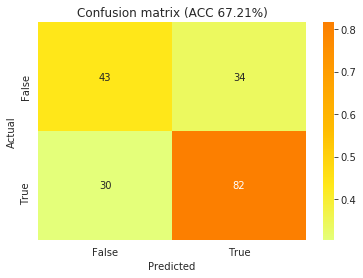

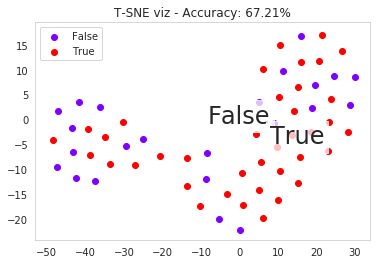

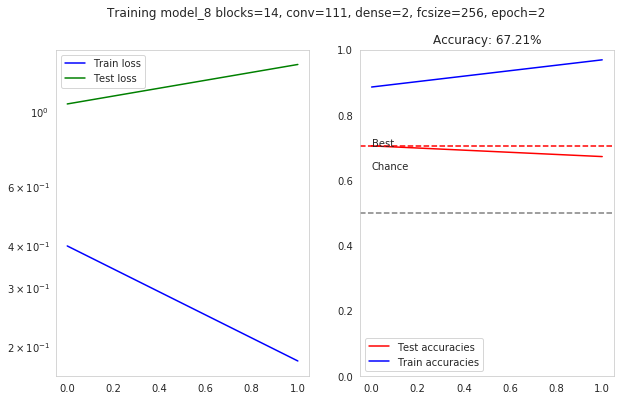

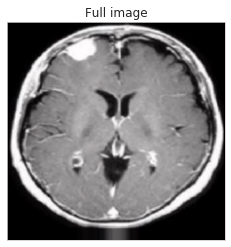

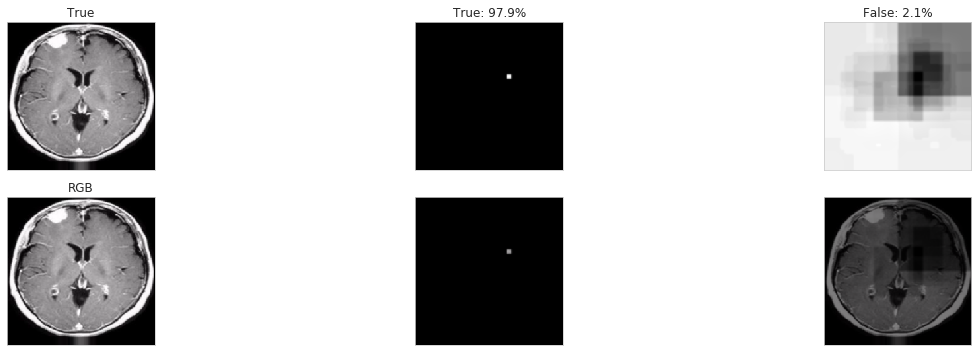

Actual: True(1)
    predicted:       True(1), confidence=0.99 [********* ]
    predicted:      False(0), confidence=0.01 [          ]
Total training time: 2.89 min, epoch: 2
Average time per epoch: 86.63 s
Epoch 3/50


Process ForkPoolWorker-19:
Process ForkPoolWorker-17:
Process ForkPoolWorker-18:
Process ForkPoolWorker-20:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/gje1631/.conda/envs/tf_gpu2/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/gje1631/.conda/envs/tf_gpu2/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/gje1631/.conda/envs/tf_gpu2/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/gje1631/.conda/envs/tf_gpu2/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/gje1631/.conda/envs/tf_gpu2/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/gje1631/.conda/envs/tf_gpu2/lib/python3.7/multiprocessing/process.py", line 99, in run
    self

KeyboardInterrupt: 

In [131]:
#%% Training code
##transfer learning
from IPython.display import clear_output

tm = time.time()
trainstats = pd.DataFrame(columns=('Train loss', 'Test loss', 'Accuracy', 'Train accuracy'))
epochs=50 ####change

from keras.callbacks import Callback

loss = model.fit_generator(
    train_generator,
    steps_per_epoch=int(len(train_generator.filenames)/batch_size),
    validation_data=(X_test, Y_test),
    validation_steps=1,
    verbose=1, epochs=epochs,
    use_multiprocessing=True,
    workers=4,
    callbacks=[VizTraining()]
)

In [56]:
def target_category_loss(x, category_index, nb_classes):
    return tf.multiply(x, K.one_hot([category_index], nb_classes))

def target_category_loss_output_shape(input_shape):
    return input_shape

def normalize(x):
    # utility function to normalize a tensor by its L2 norm
    return x / (K.sqrt(K.mean(K.square(x))) + 1e-5)

def grad_cam(input_model, image, category_index, layer_name):
    from keras.preprocessing import image
    from keras.layers.core import Lambda
    from keras.models import Sequential
    from tensorflow.python.framework import ops
    import keras.backend as K
    import tensorflow as tf
    import numpy as np
    import keras
    import sys
    import cv2
    model = Sequential()
    model.add(input_model)

    nb_classes = 2
    target_layer = lambda x: target_category_loss(x, category_index, nb_classes)
    print(target_layer)
    model.add(Lambda(target_layer,
                     output_shape = target_category_loss_output_shape))
    model.summary()

    loss = K.sum(model.layers[-1].output)
    conv_output =  [l for l in model.layers[0].layers if l.name is layer_name][0].output
    grads = K.gradients(loss, conv_output)[0]#normalize(K.gradients(loss, conv_output)[0])
    gradient_function = K.function([model.layers[0].input], [conv_output, grads])

    output, grads_val = gradient_function([image])
    output, grads_val = output[0, :], grads_val[0, :, :, :]

    weights = np.mean(grads_val, axis = (0, 1))
    cam = np.ones(output.shape[0 : 2], dtype = np.float32)

    for i, w in enumerate(weights):
        cam += w * output[:, :, i]

    cam = cv2.resize(cam, (224, 224))
    cam = np.maximum(cam, 0)
    heatmap = cam / np.max(cam)

    #Return to BGR [0..255] from the preprocessed image
    image = image[0, :]
    image -= np.min(image)
    image = np.minimum(image, 255)

    cam = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
    cam = np.float32(cam) + np.float32(image)
    cam = 255 * cam / np.max(cam)
    return np.uint8(cam), heatmap



In [55]:
K.gradients(loss, conv_output)[0]

In [70]:
# ## testing adding this sequential layer 
# from keras.models import Sequential
# from keras.layers.core import Lambda

# ##importing predictions
# def load_image(path):
#     from keras.preprocessing import image
#     import sys
#     #img_path = sys.argv[1]
#     img = image.load_img(img_path, target_size=(224, 224))
#     x = image.img_to_array(img)
#     x = np.expand_dims(x, axis=0)
#     #x = preprocess_input(x)
#     x= x/255
#     return x
# img_path='../data/train/False/1.png'
# preprocessed_input= load_image(img_path)

# predictions = model.predict(preprocessed_input)
# #top_1 = decode_predictions(predictions)[0][0]
# predicted_class = np.argmax(predictions)

# ###testing fxn internals
# input_model, image, category_index, layer_name= model, preprocessed_input, predicted_class, "block14_sepconv2_act"

# model2 = Sequential()
# model2.add(input_model)

# nb_classes = 2
# target_layer = lambda x: target_category_loss(x, category_index, nb_classes)
# print(target_layer)
# model2.add(Lambda(target_layer,
#                  output_shape = target_category_loss_output_shape))
# model2.summary()

# loss = K.sum(model2.layers[-1].output)


# conv_output =  [l for l in model2.layers[0].layers if l.name is layer_name][0].output
# grads = K.gradients(loss, conv_output)[0]#normalize(K.gradients(loss, conv_output)[0])

# #model2.inputs
# #gradient_function = K.function([model2.layers[0].input], [conv_output, grads])
# gradient_function = K.function([model2.inputs], [conv_output, grads])

<function <lambda> at 0x7f6978b40488>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 2)                 21386538  
_________________________________________________________________
lambda_12 (Lambda)           (None, 2)                 0         
Total params: 21,386,538
Trainable params: 21,332,010
Non-trainable params: 54,528
_________________________________________________________________


TypeError: Can not convert a NoneType into a Tensor or Operation.

In [76]:
grads

In [75]:
K.gradients(loss, conv_output)[0]

In [73]:
grads

In [69]:
model2.inputs

[<tf.Tensor 'model_1_input_10:0' shape=(?, ?, ?, 3) dtype=float32>]

In [66]:
model2.layers[0].layers[0]#.input

In [57]:
cam, heatmap = grad_cam(model, preprocessed_input, predicted_class, "block14_sepconv2_act")

<function grad_cam.<locals>.<lambda> at 0x7f698db79e18>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 2)                 21386538  
_________________________________________________________________
lambda_8 (Lambda)            (None, 2)                 0         
Total params: 21,386,538
Trainable params: 21,332,010
Non-trainable params: 54,528
_________________________________________________________________


AttributeError: Layer model_1 has multiple inbound nodes, hence the notion of "layer input" is ill-defined. Use `get_input_at(node_index)` instead.

In [44]:
loss

<tf.Tensor 'Sum:0' shape=() dtype=float32>

In [ ]:
[model.layers[0].input]

In [ ]:
visualize_cam(model, layer_idx, filter_indices, seed_input, penultimate_layer_idx=None, \
    backprop_modifier=None, grad_modifier=None)

In [41]:
def load_image(path):
    from keras.preprocessing import image
    import sys
    #img_path = sys.argv[1]
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    #x = preprocess_input(x)
    x= x/255
    return x
img_path='../data/train/False/1.png'
preprocessed_input= load_image(img_path)

predictions = model.predict(preprocessed_input)
#top_1 = decode_predictions(predictions)[0][0]
# print('Predicted class:')
# print('%s (%s) with probability %.2f' % (top_1[1], top_1[0], top_1[2]))

predicted_class = np.argmax(predictions)

In [143]:
predictions = model.predict(preprocessed_input)
#top_1 = decode_predictions(predictions)[0][0]
# print('Predicted class:')
# print('%s (%s) with probability %.2f' % (top_1[1], top_1[0], top_1[2]))

predicted_class = np.argmax(predictions)
cam, heatmap = grad_cam(model, preprocessed_input, predicted_class, "conv2d_4")

<function grad_cam.<locals>.<lambda> at 0x7f439a8d4f28>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 2)                 21386538  
_________________________________________________________________
lambda_7 (Lambda)            (None, 2)                 0         
Total params: 21,386,538
Trainable params: 21,332,010
Non-trainable params: 54,528
_________________________________________________________________


IndexError: list index out of range

In [136]:
model.layers[0].layers

AttributeError: 'InputLayer' object has no attribute 'layers'

In [116]:
preprocessed_input.shape

(1, 224, 224, 3)

In [113]:
predictions

array([[1.0000000e+00, 2.3169738e-14]], dtype=float32)

In [122]:
top_1

0

In [126]:
predictions = model.predict(X_test)
top_1 = decode_predictions(predictions)[0][0]

    def on_epoch_end(self, epoch, logs={}):
        clear_output(wait=True)
        tacc  = logs.get('val_acc')
        trainstats.loc[len(trainstats)] = (logs.get('loss'), logs.get('val_loss'), tacc, logs.get('acc')) 
        confusion_matrix(model, X_test, Y_test, tacc, save=False)



pred = model.predict(np.expand_dims(im, 0))

# print('Predicted class:')
# print('%s (%s) with probability %.2f' % (top_1[1], top_1[0], top_1[2]))

# predicted_class = np.argmax(predictions)

IndentationError: unexpected indent (<ipython-input-126-9dde363b5b09>, line 4)

In [ ]:
cam, heatmap = grad_cam(model, preprocessed_input, predicted_class, "block5_conv3")

In [105]:
img_path

'../data/train/False/1.png'

In [96]:
X_test.shape

(50, 224, 224, 3)

In [107]:
def load_image(path):
    from keras.preprocessing import image
    import sys
    #img_path = sys.argv[1]
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    #x = preprocess_input(x)
    x= x/255
    return x

img_cam= load_image(img_path)

In [38]:
def visualize_class_activation_map(model_path, img_path, output_path):
    from keras.models import load_model
    from keras import model
    model = model#load_model(model_path)
    original_img = cv2.imread(img_path, 1)
    width, height, _ = original_img.shape

    #Reshape to the network input shape (3, w, h).
    img = np.array([np.transpose(np.float32(original_img), (2, 0, 1))])

    #Get the 512 input weights to the softmax.
    class_weights = model.layers[-1].get_weights()[0]
    final_conv_layer = get_output_layer(model, "block14_sepconv2_act")#get_output_layer(model, "block14_sepconv2_act") #changed
    get_output = K.function([model.layers[0].input], \
                [final_conv_layer.output, 
    model.layers[-1].output])
    
    [conv_outputs, predictions] = get_output([img])
    #[conv_outputs, predictions] = model.output([img])#get_output([img])
    conv_outputs = conv_outputs[0, :, :, :]

    #Create the class activation map.
    cam = np.zeros(dtype = np.float32, shape = conv_outputs.shape[1:3])
    target_class = 1
    for i, w in enumerate(class_weights[:, target_class]):
            cam += w * conv_outputs[i, :, :]

In [56]:
model= model
img_path='../data/train/False/1.png'
origional_img=cv2.imread(img_path,1)
original_img = cv2.imread(img_path, 1)
width, height, _ = original_img.shape

#Reshape to the network input shape (3, w, h).
img = np.array([np.transpose(np.float32(original_img), (2, 0, 1))]) #(224, 224, 3)
class_weights = model.layers[-1].get_weights()[0]

final_conv_layer = get_output_layer(model, "block14_sepconv2_act")#get_output_layer(model, "block14_sepconv2_act") #changed #<tf.Tensor 'block14_sepconv2_act/Relu:0' shape=(?, ?, ?, 2048) dtype=float32>


In [74]:
get_output = K.function(
    [model.layers[0].input], #[<tf.Tensor 'input_1:0' shape=(?, ?, ?, 3) dtype=float32>]
    [final_conv_layer.output, #[<tf.Tensor 'block14_sepconv2_act/Relu:0' shape=(?, ?, ?, 2048) dtype=float32>
     model.layers[-1].output] # <tf.Tensor 'dense_2/Softmax:0' shape=(?, 2) dtype=float32>
)

In [86]:
get_output([img])

InvalidArgumentError: transpose expects a vector of size 3. But input(1) is a vector of size 4
	 [[{{node block1_conv1/convolution-0-TransposeNHWCToNCHW-LayoutOptimizer}}]]
	 [[{{node dense_2/Softmax}}]]

In [87]:
img.shape

(224, 224, 3)

In [80]:
#get_output([3,])
#[model.layers[0].input]
final_conv_layer.output

<tf.Tensor 'block14_sepconv2_act/Relu:0' shape=(?, ?, ?, 2048) dtype=float32>

In [81]:
model.layers[-1].output

<tf.Tensor 'dense_2/Softmax:0' shape=(?, 2) dtype=float32>

In [69]:
def get_output_layer(model, layer_name):
    # get the symbolic outputs of each "key" layer (we gave them unique names).
    layer_dict = dict([(layer.name, layer) for layer in model.layers])
    layer = layer_dict[layer_name]
    return layer

In [72]:
final_conv_layer

In [83]:
[np.transpose(np.float32(original_img), (2, 0, 1))]

[array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)]

In [84]:
img

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [75]:
[conv_outputs, predictions] = model.output([img])

TypeError: 'Tensor' object is not callable

In [45]:
model_save= model

class_weights = model.layers[-1].get_weights()[0]
final_conv_layer = get_output_layer(model, "block14_sepconv2_act")
get_output = K.function([model.layers[0].input], \
            [final_conv_layer.output, 
model.layers[-1].output])

convout1_f = theano.function([model.get_input(train=False)], convout1.get_output(train=False))

[conv_outputs, predictions] = get_output([img])
conv_outputs = conv_outputs[0, :, :, :]

AttributeError: 'Model' object has no attribute 'get_input'

In [42]:
final_conv_layer

In [49]:
layer.output

NameError: name 'layer' is not defined

In [50]:
final_conv_layer

In [40]:
def get_output_layer(model, layer_name):
    # get the symbolic outputs of each "key" layer (we gave them unique names).
    layer_dict = dict([(layer.name, layer) for layer in model.layers])
    layer = layer_dict[layer_name]
    return layer

In [46]:
test_img=cv2.imread('../data/train/False/1.png', 1)
test_img.shape
img = np.array([np.transpose(np.float32(test_img), (2, 0, 1))])
img.shape

(1, 3, 400, 400)

In [ ]:
visualize_class_activation_map(modelid, '../data/train/False/1.png', '../data/')

Confusion Matrix


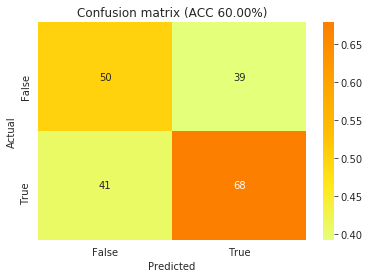

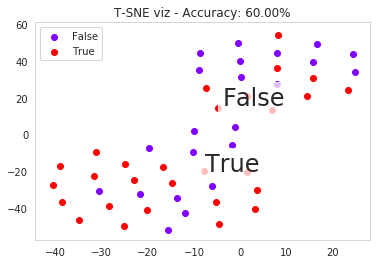

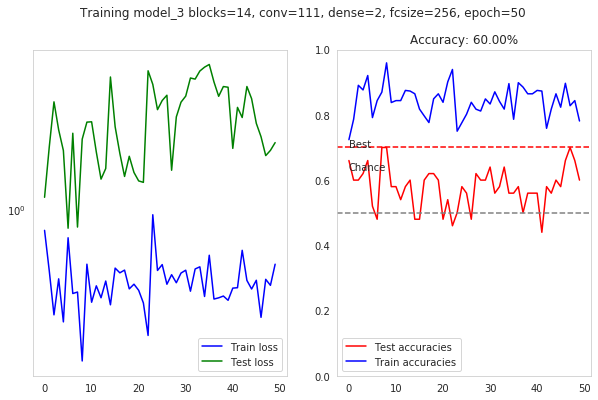

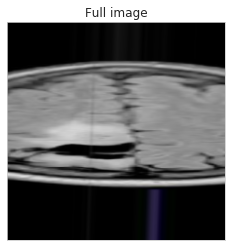

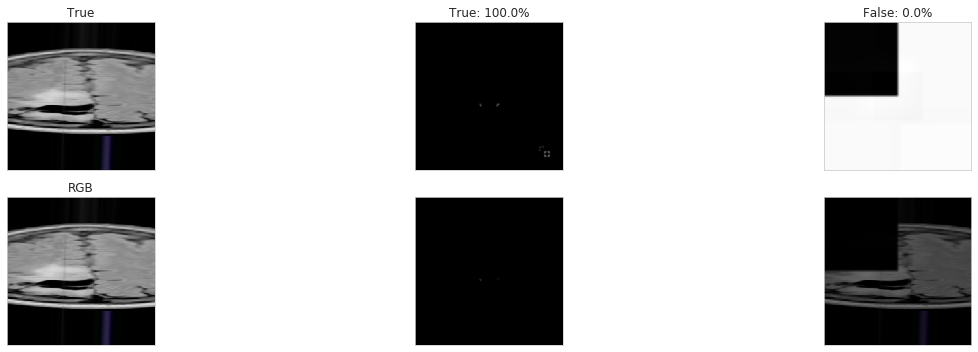

Actual: True(1)
    predicted:       True(1), confidence=1.00 [**********]
    predicted:      False(0), confidence=0.00 [          ]
Total training time: 14.71 min, epoch: 50
Average time per epoch: 17.65 s


In [112]:
#%% Training code
##transfer learning
from IPython.display import clear_output

tm = time.time()
trainstats = pd.DataFrame(columns=('Train loss', 'Test loss', 'Accuracy', 'Train accuracy'))
epochs=50 ####change

from keras.callbacks import Callback

loss = model.fit_generator(
    train_generator,
    steps_per_epoch=int(len(train_generator.filenames)/batch_size),
    validation_data=(X_test, Y_test),
    validation_steps=1,
    verbose=1, epochs=epochs,
    use_multiprocessing=True,
    workers=4,
    callbacks=[VizTraining()]
)

In [113]:
# loss

In [141]:
loss

NameError: name 'loss' is not defined

# working heatmap

In [38]:
##### Author: Yanrong Ji, Yucheng Zhu, Sharon Zhang, Claudia Xu #####

import os
import cv2
import sys
import glob
import math
import tempfile
import argparse
import numpy as np
import pandas as pd
from PIL import Image
from PIL import ImageFile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.backend as K
from tensorflow.keras.models import *
from tensorflow.keras import activations
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import *
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Input,Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input, decode_predictions

ImageFile.LOAD_TRUNCATED_IMAGES = True
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ["CUDA_VISIBLE_DEVICES"]="-1" # do not use gpu
os.environ['TF_CPP_MIN_LOG_LEVEL'] ="3" # Supress tensorflow warning

# # Fix tensorflow GPU allocation
# #%% GPU memory fix
# def get_session(gpu_fraction=0.5):    
#     gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=gpu_fraction, allow_growth=True)    
#     return tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
# keras.backend.set_session(get_session())

# # Qucik check if it is using GPU
# from tensorflow.python.client import device_lib
# def get_available_gpus():
#     local_device_protos = device_lib.list_local_devices()
#     return [x.name for x in local_device_protos if x.device_type == 'GPU']
     

# print("Tensorflow Version:", tf.__version__)
# print(tf.keras.__version__)
# print(get_available_gpus())



def find_layer_idx(model, layer_name):
    """Looks up the layer index corresponding to `layer_name` from `model`.
    Args:
        model: The `keras.models.Model` instance.
        layer_name: The name of the layer to lookup.
    Returns:
        The layer index if found. Raises an exception otherwise.
    """
    layer_idx = None
    for idx, layer in enumerate(model.layers):
        if layer.name == layer_name:
            layer_idx = idx
            break

    if layer_idx is None:
        raise ValueError("No layer with name '{}' within the model".format(layer_name))
    return layer_idx

def apply_modifications(model, custom_objects=None):
    """Applies modifications to the model layers to create a new Graph. For example, simply changing
    `model.layers[idx].activation = new activation` does not change the graph. The entire graph needs to be updated
    with modified inbound and outbound tensors because of change in layer building function.
    Args:
        model: The `keras.models.Model` instance.
    Returns:
        The modified model with changes applied. Does not mutate the original `model`.
    """
    # The strategy is to save the modified model and load it back. This is done because setting the activation
    # in a Keras layer doesnt actually change the graph. We have to iterate the entire graph and change the
    # layer inbound and outbound nodes with modified tensors. This is doubly complicated in Keras 2.x since
    # multiple inbound and outbound nodes are allowed with the Graph API.
    model_path = os.path.join(tempfile.gettempdir(), next(tempfile._get_candidate_names()) + '.h5')
    try:
        model.save(model_path)
        return load_model(model_path, custom_objects=custom_objects)
    finally:
        os.remove(model_path)

def convert_model(current_model):
    # Utility to search for layer index by name. 
    # Alternatively we can specify this as -1 since it corresponds to the last layer.
    layer_idx = find_layer_idx(current_model, 'dense_2')

    # Swap softmax with linear
    current_model.layers[layer_idx].activation = activations.linear
    new_model = apply_modifications(current_model)
    return new_model

def visualize_cam(model, img_path, conv_layer = 'conv_7b', size = (300,300), hif = .8, bw = False):
    original_img = cv2.imread(img_path, 3)
    
    img = image.load_img(img_path, target_size=size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    x = x/255

    # Prediction
    preds = model.predict(x)
    print(preds)
    argmax = np.argmax(preds[0])
    output = model.output[:, argmax]
    print("* Predicted class for color: ", argmax)
    
    

    last_conv_layer = model.get_layer(conv_layer)
    grads = K.gradients(output, last_conv_layer.output)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([x])
    
    for i in range(last_conv_layer.output_shape[3]):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    heatmap = cv2.resize(heatmap, (original_img.shape[1], original_img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    
    superimposed_img = heatmap * hif + original_img

    if bw:
        # grayscale
        original_img_bw = cv2.imread(img_path, 0)
        img_bw = cv2.resize(original_img_bw,(300,300))
        img_bw = cv2.cvtColor(img_bw, cv2.COLOR_GRAY2RGB);
        
        x_bw = image.img_to_array(img_bw)
        x_bw = np.expand_dims(x_bw, axis=0)
        x_bw = preprocess_input(x_bw)
        x_bw = x_bw/255

        # Prediction
        preds_bw = model.predict(x_bw)
        print(preds_bw)
        argmax_bw = np.argmax(preds_bw[0])
        output_bw = model.output[:, argmax_bw]
        print("* Predicted class for bw: ", argmax_bw)

        last_conv_layer = model.get_layer(conv_layer)
        grads_bw = K.gradients(output_bw, last_conv_layer.output)[0]
        pooled_grads_bw = K.mean(grads_bw, axis=(0, 1, 2))
        iterate = K.function([model.input], [pooled_grads_bw, last_conv_layer.output[0]])
        pooled_grads_value_bw, conv_layer_output_value_bw = iterate([x])

        for i in range(last_conv_layer.output_shape[3]):
            conv_layer_output_value_bw[:, :, i] *= pooled_grads_value_bw[i]
        
        heatmap_bw = np.mean(conv_layer_output_value_bw, axis=-1)
        heatmap_bw = np.maximum(heatmap_bw, 0)
        heatmap_bw /= np.max(heatmap_bw)

        heatmap_bw = cv2.resize(heatmap_bw, (original_img_bw.shape[1], original_img_bw.shape[0]))
        heatmap_bw = np.uint8(255 * heatmap_bw)
        heatmap_bw = cv2.applyColorMap(heatmap_bw, cv2.COLORMAP_BONE)
        original_img_bw = cv2.cvtColor(original_img_bw, cv2.COLOR_GRAY2RGB);
        superimposed_img_bw = heatmap_bw * hif + original_img_bw

        return [original_img, superimposed_img, superimposed_img_bw]

    else:
        return [original_img, superimposed_img, 0]


def get_args():
    parser = argparse.ArgumentParser()
    parser.add_argument("--image_path", type = str, help = "Path of an image to run the network on")
    parser.add_argument("--output_path", type = str, default = "./", help = "Output path + basename")
    parser.add_argument("--model_path", type = str, default = "./model.h5", help = "Path of the trained (and converted) model")
    parser.add_argument("--convert_model", type = bool, default = False, help = 'Convert model softmax layer to linear layer?')
    parser.add_argument("--output_all", type = bool, default = False, help = 'Output all images (original+color+bw)?')
    parser.add_argument("--conv_layer_name", type = str, default = 'conv', help = 'Name of last convolutional layer?')
    parser.add_argument("--image_size", type = int, default = 300, help = 'Image size of model (an int)?')
    parser.add_argument("--hif", type = float, default = .8, help = 'Heatmap factor?')
    args = parser.parse_args()
    return args



In [78]:
cmodel = convert_model(model)

In [74]:
# model_path=modelid
# model=model
# output_path="../misc/testingF"
# img_size=224
# image_path='../data/test/False/19.png' #'../data/train/False/1.png'
# conv_layer_name='block14_sepconv2_act'
# convert=True
# hif=0.6
# output_all=True

# # print('* Loading model from: ', model_path)
# # model = model#modload_model(model_path)


# img_size = img_size
# imgs = visualize_cam(cmodel, image_path, conv_layer = conv_layer_name, size = (img_size,img_size), hif = hif, bw = True)

# print('* Saving color heatmap at: ', output_path + '_heatmap_color.jpg')
# cv2.imwrite(output_path + '_heatmap_color.jpg', imgs[1])

# if output_all==True:
#     print('* Saving original image at: ', output_path + '_original.jpg')
#     cv2.imwrite(output_path + '_original.jpg', imgs[0])
#     print('* Saving grayscale heatmap at: ', output_path + '_heatmap_bw.jpg')
#     cv2.imwrite(output_path + '_heatmap_bw.jpg', imgs[2])


[[-0.3445811   0.28750333]]
* Predicted class for color:  1
[[ 0.08639864 -0.08652093]]
* Predicted class for bw:  0
* Saving color heatmap at:  ../misc/testingF_heatmap_color.jpg
* Saving original image at:  ../misc/testingF_original.jpg
* Saving grayscale heatmap at:  ../misc/testingF_heatmap_bw.jpg


In [81]:
model_path=modelid
model=model
# output_path="../misc/19"
img_size=224
# image_path='../data/test/True/19.png' #'../data/train/False/1.png'
conv_layer_name='block14_sepconv2_act'
convert=True
hif=0.7
output_all=True

for element in glob.glob("../data/test/True/"+"*"):
    file_num=element.strip(".png").split('/')[-1]
    image_path= element
    output_path="../misc/no_aug_true/{}".format(file_num)
    
    img_size = img_size
    imgs = visualize_cam(cmodel, image_path, conv_layer = conv_layer_name, size = (img_size,img_size), hif = hif, bw = False)

    print('* Saving color heatmap at: ', output_path + '_heatmap_color.jpg')
    cv2.imwrite(output_path + '_heatmap_color.jpg', imgs[1])

    if output_all==True:
        print('* Saving original image at: ', output_path + '_original.jpg')
        cv2.imwrite(output_path + '_original.jpg', imgs[0])
        print('* Saving grayscale heatmap at: ', output_path + '_heatmap_bw.jpg')
        cv2.imwrite(output_path + '_heatmap_bw.jpg', imgs[2])


[[-0.35993207  0.3014586 ]]
* Predicted class for color:  1
* Saving color heatmap at:  ../misc/no_aug_true/10_heatmap_color.jpg
* Saving original image at:  ../misc/no_aug_true/10_original.jpg
* Saving grayscale heatmap at:  ../misc/no_aug_true/10_heatmap_bw.jpg
[[-0.36069828  0.3021196 ]]
* Predicted class for color:  1
* Saving color heatmap at:  ../misc/no_aug_true/28_heatmap_color.jpg
* Saving original image at:  ../misc/no_aug_true/28_original.jpg
* Saving grayscale heatmap at:  ../misc/no_aug_true/28_heatmap_bw.jpg
[[-0.37731555  0.3169815 ]]
* Predicted class for color:  1
* Saving color heatmap at:  ../misc/no_aug_true/6_heatmap_color.jpg
* Saving original image at:  ../misc/no_aug_true/6_original.jpg
* Saving grayscale heatmap at:  ../misc/no_aug_true/6_heatmap_bw.jpg
[[-0.3668093  0.30755  ]]
* Predicted class for color:  1
* Saving color heatmap at:  ../misc/no_aug_true/26_heatmap_color.jpg
* Saving original image at:  ../misc/no_aug_true/26_original.jpg
* Saving grayscale 

In [82]:
model_path=modelid
model=model
# output_path="../misc/19"
img_size=224
# image_path='../data/test/True/19.png' #'../data/train/False/1.png'
conv_layer_name='block14_sepconv2_act'
convert=True
hif=0.7
output_all=True

for element in glob.glob("../data/test/False/"+"*"):
    file_num=element.strip(".png").split('/')[-1]
    image_path= element
    output_path="../misc/no_aug_false/{}".format(file_num)
    
    img_size = img_size
    imgs = visualize_cam(cmodel, image_path, conv_layer = conv_layer_name, size = (img_size,img_size), hif = hif, bw = False)

    print('* Saving color heatmap at: ', output_path + '_heatmap_color.jpg')
    cv2.imwrite(output_path + '_heatmap_color.jpg', imgs[1])

    if output_all==True:
        print('* Saving original image at: ', output_path + '_original.jpg')
        cv2.imwrite(output_path + '_original.jpg', imgs[0])
        print('* Saving grayscale heatmap at: ', output_path + '_heatmap_bw.jpg')
        cv2.imwrite(output_path + '_heatmap_bw.jpg', imgs[2])


[[-0.3716818  0.311986 ]]
* Predicted class for color:  1
* Saving color heatmap at:  ../misc/no_aug_false/10_heatmap_color.jpg
* Saving original image at:  ../misc/no_aug_false/10_original.jpg
* Saving grayscale heatmap at:  ../misc/no_aug_false/10_heatmap_bw.jpg
[[-0.36356097  0.30460268]]
* Predicted class for color:  1
* Saving color heatmap at:  ../misc/no_aug_false/6_heatmap_color.jpg
* Saving original image at:  ../misc/no_aug_false/6_original.jpg
* Saving grayscale heatmap at:  ../misc/no_aug_false/6_heatmap_bw.jpg
[[-0.3445811   0.28750333]]
* Predicted class for color:  1
* Saving color heatmap at:  ../misc/no_aug_false/19_heatmap_color.jpg
* Saving original image at:  ../misc/no_aug_false/19_original.jpg
* Saving grayscale heatmap at:  ../misc/no_aug_false/19_heatmap_bw.jpg
[[-0.37618977  0.31601128]]
* Predicted class for color:  1
* Saving color heatmap at:  ../misc/no_aug_false/12_heatmap_color.jpg
* Saving original image at:  ../misc/no_aug_false/12_original.jpg
* Saving

In [65]:
str.strip?

Signature: str.strip(self, chars=None, /)
Docstring:
Return a copy of the string with leading and trailing whitespace remove.

If chars is given and not None, remove characters in chars instead.
Type:      method_descriptor
